In [2]:
# Author Stefano Carrazza
# includes
import lhapdf
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.font_manager import FontProperties
import numpy as np
import math
import pylab

In [3]:
# define the correlation between 2 pdfs
def correlation(x1, x2, q, fl1, fl2, pdf, ind):
    nrep = len(ind)
    a = b = ab = sq_a = sq_b = 0.0
    for r in range(0,nrep):
        v1 = pdf[ind[r]].xfxQ(fl1, x1, q)
        v2 = pdf[ind[r]].xfxQ(fl2, x2, q)
        ab += v1*v2
        a  += v1
        b  += v2
        sq_a += v1*v1
        sq_b += v2*v2
    a /= nrep
    b /= nrep
    ab /= nrep
    sig1 = math.sqrt(sq_a/(nrep-1.0) - nrep/(nrep-1.0)*a*a)
    sig2 = math.sqrt(sq_b/(nrep-1.0) - nrep/(nrep-1.0)*b*b)
    
    return nrep/(nrep-1.0)*(ab-a*b)/(sig1*sig2)

# define the correlation between 2 pdfs
def correlationHessian(x1, x2, q, fl1, fl2, pdf, ind):
    nrep = len(ind)
    ab = sq_a = sq_b = 0.0
    for r in range(0,nrep):
        v1 = pdf[ind[r]].xfxQ(fl1, x1, q)-pdf[0].xfxQ(fl1, x1, q)
        v2 = pdf[ind[r]].xfxQ(fl2, x2, q)-pdf[0].xfxQ(fl2, x2, q)
        ab += v1*v2        
        sq_a += v1**2
        sq_b += v2**2
        
    sig1 = math.sqrt(sq_a)
    sig2 = math.sqrt(sq_b)
    
    return ab/(sig1*sig2)

In [4]:
# Loading the prior
pset = lhapdf.getPDFSet("1000rep")
prior = []
pindex = []
for i in range(0,pset.size): prior.append(pset.mkPDF(i))
for i in range(1,pset.size): pindex.append(i)

pset2 = lhapdf.getPDFSet("NNPDF30_nlo_as_0118_hessian")
prior2 = []    
pindex2 = []
for i in range(0,pset2.size): prior2.append(pset2.mkPDF(i))
for i in range(1,pset2.size): pindex2.append(i)

In [5]:
# Loading the compression
#compressions = [10,20,30,40,50,60,70,80,90,100]
compressions = []
cindex = []
for i in range(len(compressions)):    
    f = open('replica_compression_' + str(compressions[i]) + '.dat')
    cindex.append([])
    for l in f.readlines():
        cindex[i].append(int(l))
    f.close()

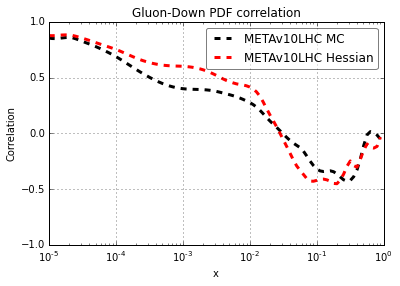

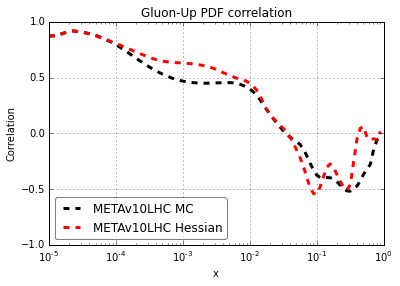

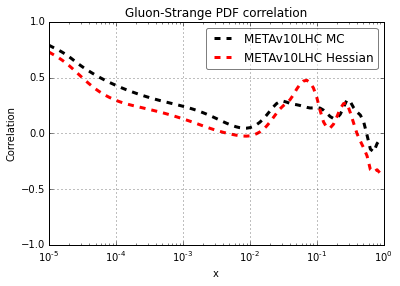

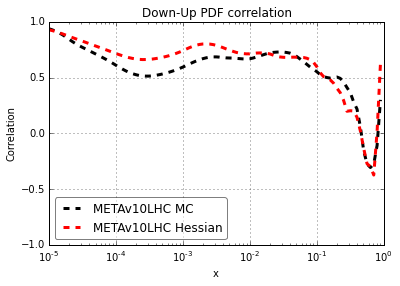

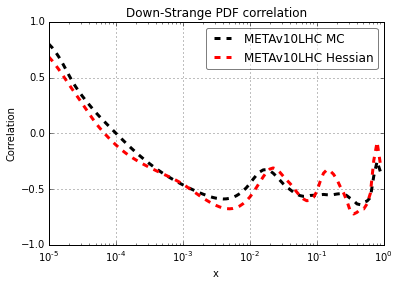

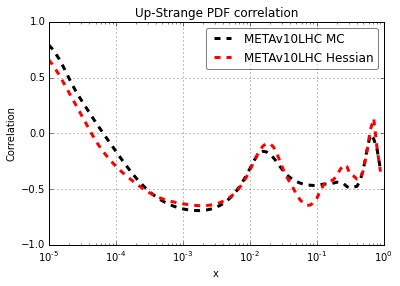

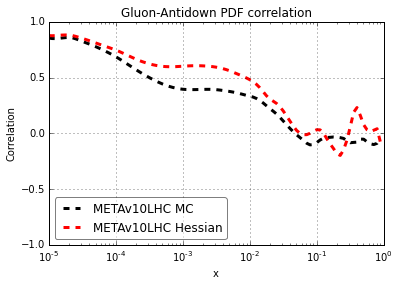

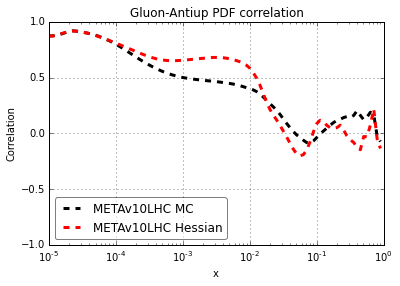

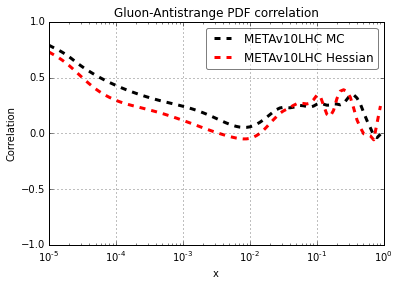

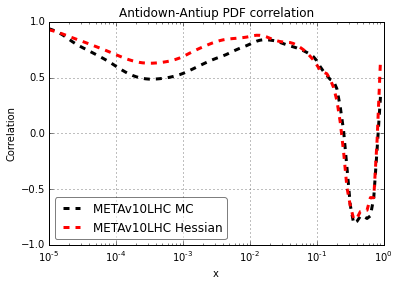

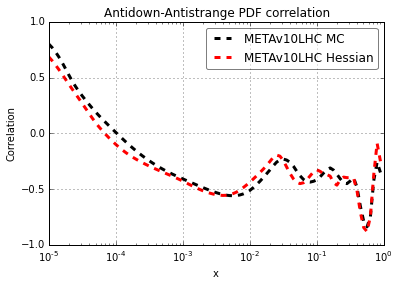

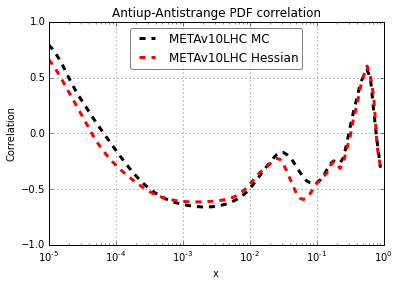

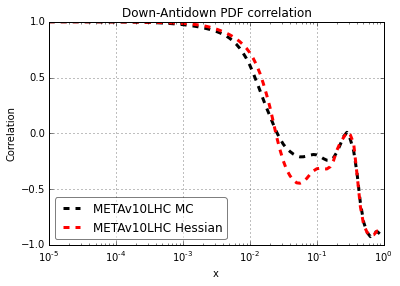

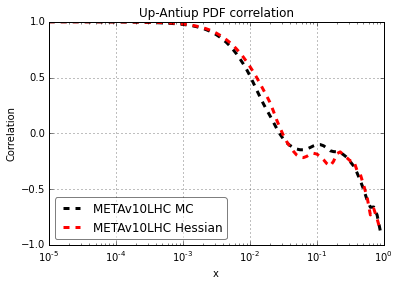

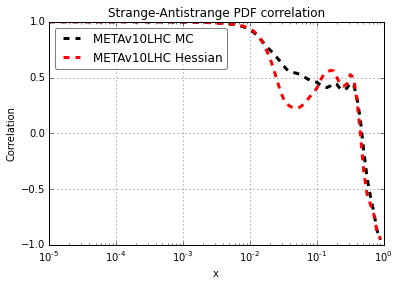

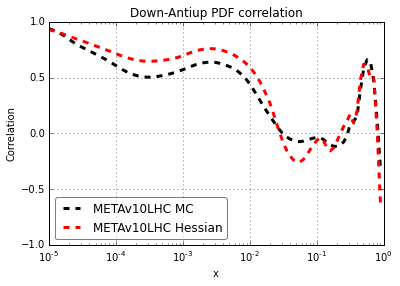

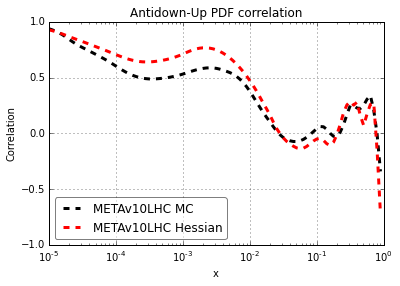

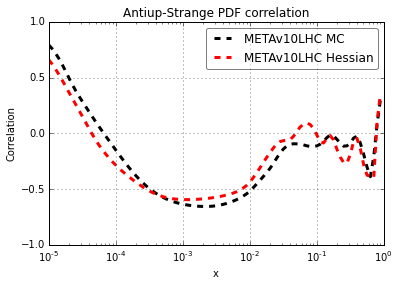

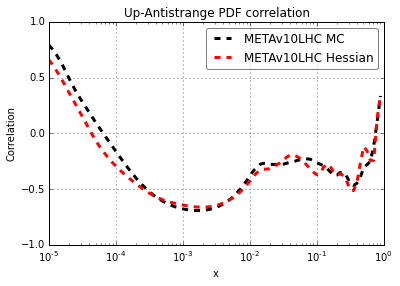

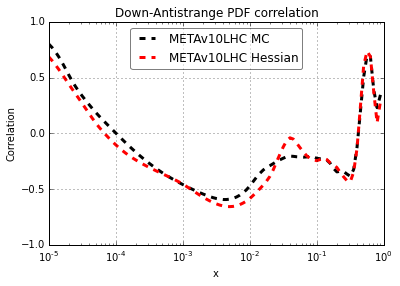

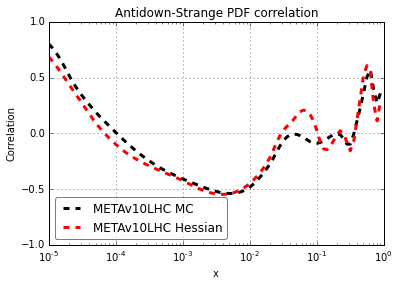

In [6]:
# plotting correlations
fls = [ [21,1], [21,2], [21,3], [1,2], [1,3], [2,3],
       [21,-1], [21,-2], [21,-3], [-1,-2], [-1,-3], [-2,-3],
       [1,-1], [2,-2], [3,-3], [1,-2], [-1,2], [-2,3], [2,-3], [1,-3], [-1,3] ] 

d = {21: "Gluon", 1: "Down", 2: "Up", 3: "Strange", -1: "Antidown", -2: "Antiup", -3: "Antistrange"}

# x points
x = np.logspace(math.log(1e-5), math.log(0.9), num=100, base=math.exp(1))
q = 100

for fl in fls:
    plt.figure()
    y = np.empty(x.size)
    y2 = np.empty(x.size)
    
    for i in range(0,x.size):
        y[i] = correlation(x[i], q, fl[0], fl[1], prior, pindex)
        y2[i] = correlationHessian(x[i], q, fl[0], fl[1], prior2, pindex2)

            
    plt.plot(x,y,'--',color='k', linewidth=3.0, label="METAv10LHC MC ")
    plt.plot(x,y2,'--',color='r', linewidth=3.0, label="METAv10LHC Hessian")

    #legend = plt.legend()
    legend = plt.legend(loc=0, fancybox=True, framealpha=0.5)

    plt.xlabel('x')
    plt.ylabel('Correlation')
    plt.title(str(d[fl[0]])+"-"+str(d[fl[1]])+' PDF correlation')
    plt.xscale('log')
    plt.ylim([-1,1])
    plt.grid(True)          
    plt.savefig(str(d[fl[0]])+"-"+str(d[fl[1]])+'_correlation.pdf')

In [6]:
# x points
x = np.logspace(math.log(1e-5), math.log(0.99), num=50, base=math.exp(1))
q = 1

nf = 7
M1 = np.zeros(shape=(nf*x.size,nf*x.size))
M2 = np.zeros(shape=(nf*x.size,nf*x.size))

for fl1 in range(-3,4):
    for fl2 in range(-3, 4):
        
        for i in range(x.size):        
            for j in range(x.size):
                
                pi = (fl1+3)*x.size + i
                pj = (fl2+3)*x.size + j
                if (pj >= pi):                
                    M1[pi,pj] = correlation(x[i], x[j], q, fl1, fl2, prior, pindex)
                    M2[pi,pj] = correlationHessian(x[i], x[j], q, fl1, fl2, prior2, pindex2)                
                    M1[pj, pi] = M1[pi, pj]
                    M2[pj, pi] = M2[pi, pj]

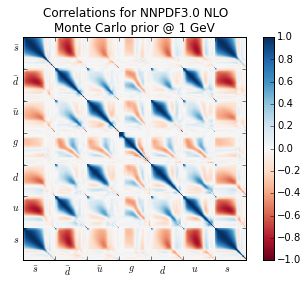

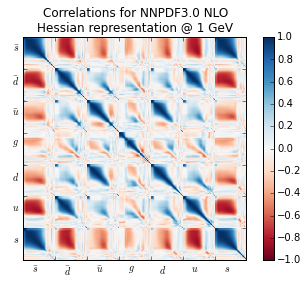

In [41]:
#f, axs = plt.subplots(1, 2,figsize=(15,4*9))
from matplotlib.ticker import *
plt.imshow(M1,cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlations for NNPDF3.0 NLO\nMonte Carlo prior @ 1 GeV')
plt.colorbar()
frame = plt.gca()
frame.axes.get_yaxis().set_major_locator(LinearLocator(8))
frame.get_yaxis().set_major_formatter(FixedFormatter(['\n\n' + r'$\bar{s}$', '\n\n' + r'$\bar{d}$', '\n\n' + r'$\bar{u}$', 
                                                      '\n\n$g$', '\n\n$d$', '\n\n$u$', '\n\n$s$']))
frame.axes.get_xaxis().set_major_locator(LinearLocator(8))
frame.get_xaxis().set_major_formatter(FixedFormatter(['\t'+r'$\bar{s}$', '\t'+r'$\bar{d}$', '\t'+r'$\bar{u}$', 
                                                      '\t$g$', '\t$d$', '\t$u$', '\t$s$']))

plt.figure()
plt.imshow(M2,cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlations for NNPDF3.0 NLO\nHessian representation @ 1 GeV')
plt.colorbar()

frame = plt.gca()
frame.axes.get_yaxis().set_major_locator(LinearLocator(8))
frame.get_yaxis().set_major_formatter(FixedFormatter(['\n\n' + r'$\bar{s}$', '\n\n' + r'$\bar{d}$', '\n\n' + r'$\bar{u}$', 
                                                      '\n\n$g$', '\n\n$d$', '\n\n$u$', '\n\n$s$']))
frame.axes.get_xaxis().set_major_locator(LinearLocator(8))
frame.get_xaxis().set_major_formatter(FixedFormatter(['\t'+r'$\bar{s}$', '\t'+r'$\bar{d}$', '\t'+r'$\bar{u}$', 
                                                      '\t$g$', '\t$d$', '\t$u$', '\t$s$']))

In [109]:
# x points
x = np.logspace(math.log(1e-5), math.log(0.99), num=50, base=math.exp(1))
q = 100

nf = 7
M1b = np.zeros(shape=(nf*x.size,nf*x.size))
M2b = np.zeros(shape=(nf*x.size,nf*x.size))

for fl1 in range(-3,4):
    for fl2 in range(-3, 4):
        
        for i in range(x.size):        
            for j in range(x.size):
                
                pi = (fl1+3)*x.size + i
                pj = (fl2+3)*x.size + j
                if (pj >= pi):                
                    M1b[pi,pj] = correlation(x[i], x[j], q, fl1, fl2, prior, pindex)
                    M2b[pi,pj] = correlationHessian(x[i], x[j], q, fl1, fl2, prior2, pindex2)                
                    M1b[pj, pi] = M1b[pi, pj]
                    M2b[pj, pi] = M2b[pi, pj]

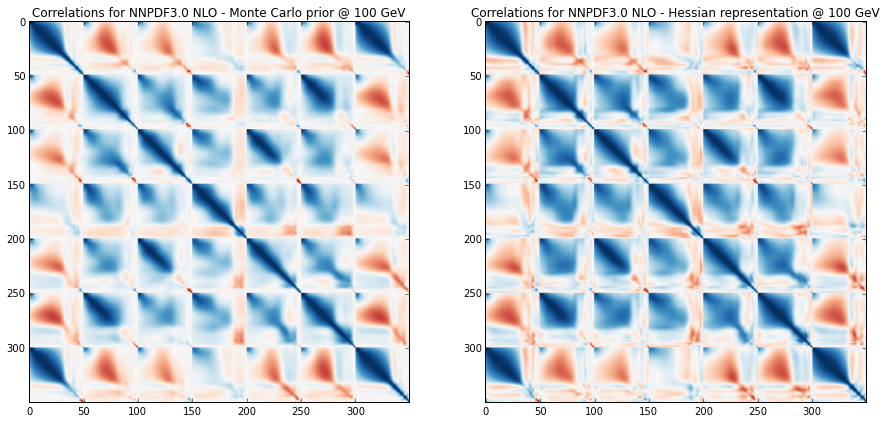

In [110]:
f, axs = plt.subplots(1, 2,figsize=(15,4*9))

axs[0].imshow(M1b,cmap='RdBu', vmin=-1, vmax=1)
axs[0].set_title('Correlations for NNPDF3.0 NLO - Monte Carlo prior @ 100 GeV')
axs[1].imshow(M2b,cmap='RdBu', vmin=-1, vmax=1)
axs[1].set_title('Correlations for NNPDF3.0 NLO - Hessian representation @ 100 GeV')